## Análisis de la enfermedad renal crónica

In [2]:
#Librerías
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from joblib import dump
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pickle
from io import StringIO
import pydotplus
from IPython.display import Image


In [3]:
#Importación del Dataset
dataset = pd.read_csv("kidney_disease.csv")
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
# Se devuelve la lista con los nombres de las columnas del DataFrame
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
# Proporciona un resumen conciso del DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# Verifica si hay algún valor nulo en cada columna del DataFrame
dataset.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [7]:
# Cuenta el número de valores nulos en cada columna del DataFrame
dataset.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
# Se genera estadísticas descriptivas de las columnas numéricas en un DataFrame
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [9]:
# Obtener un resumen de la distribución de valores en una columna categórica "Albúmina".
dataset['al'].value_counts()

al
0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64

## Diagrama de dispersión

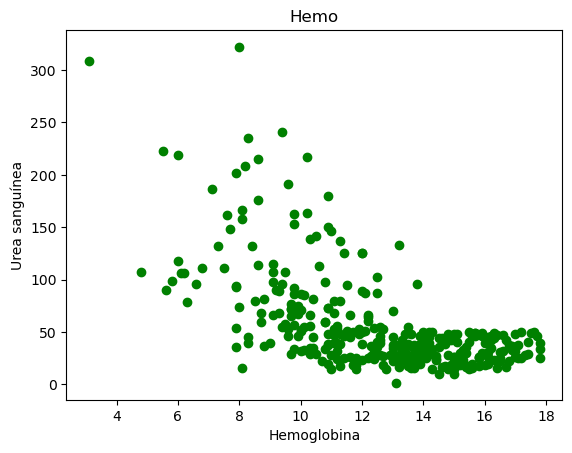

In [11]:
plt.scatter(dataset['hemo'],dataset['bu'],color='g')
plt.xlabel("Hemoglobina")
plt.ylabel("Urea sanguínea")
plt.title("Hemo")
plt.show()

### Pair Plots

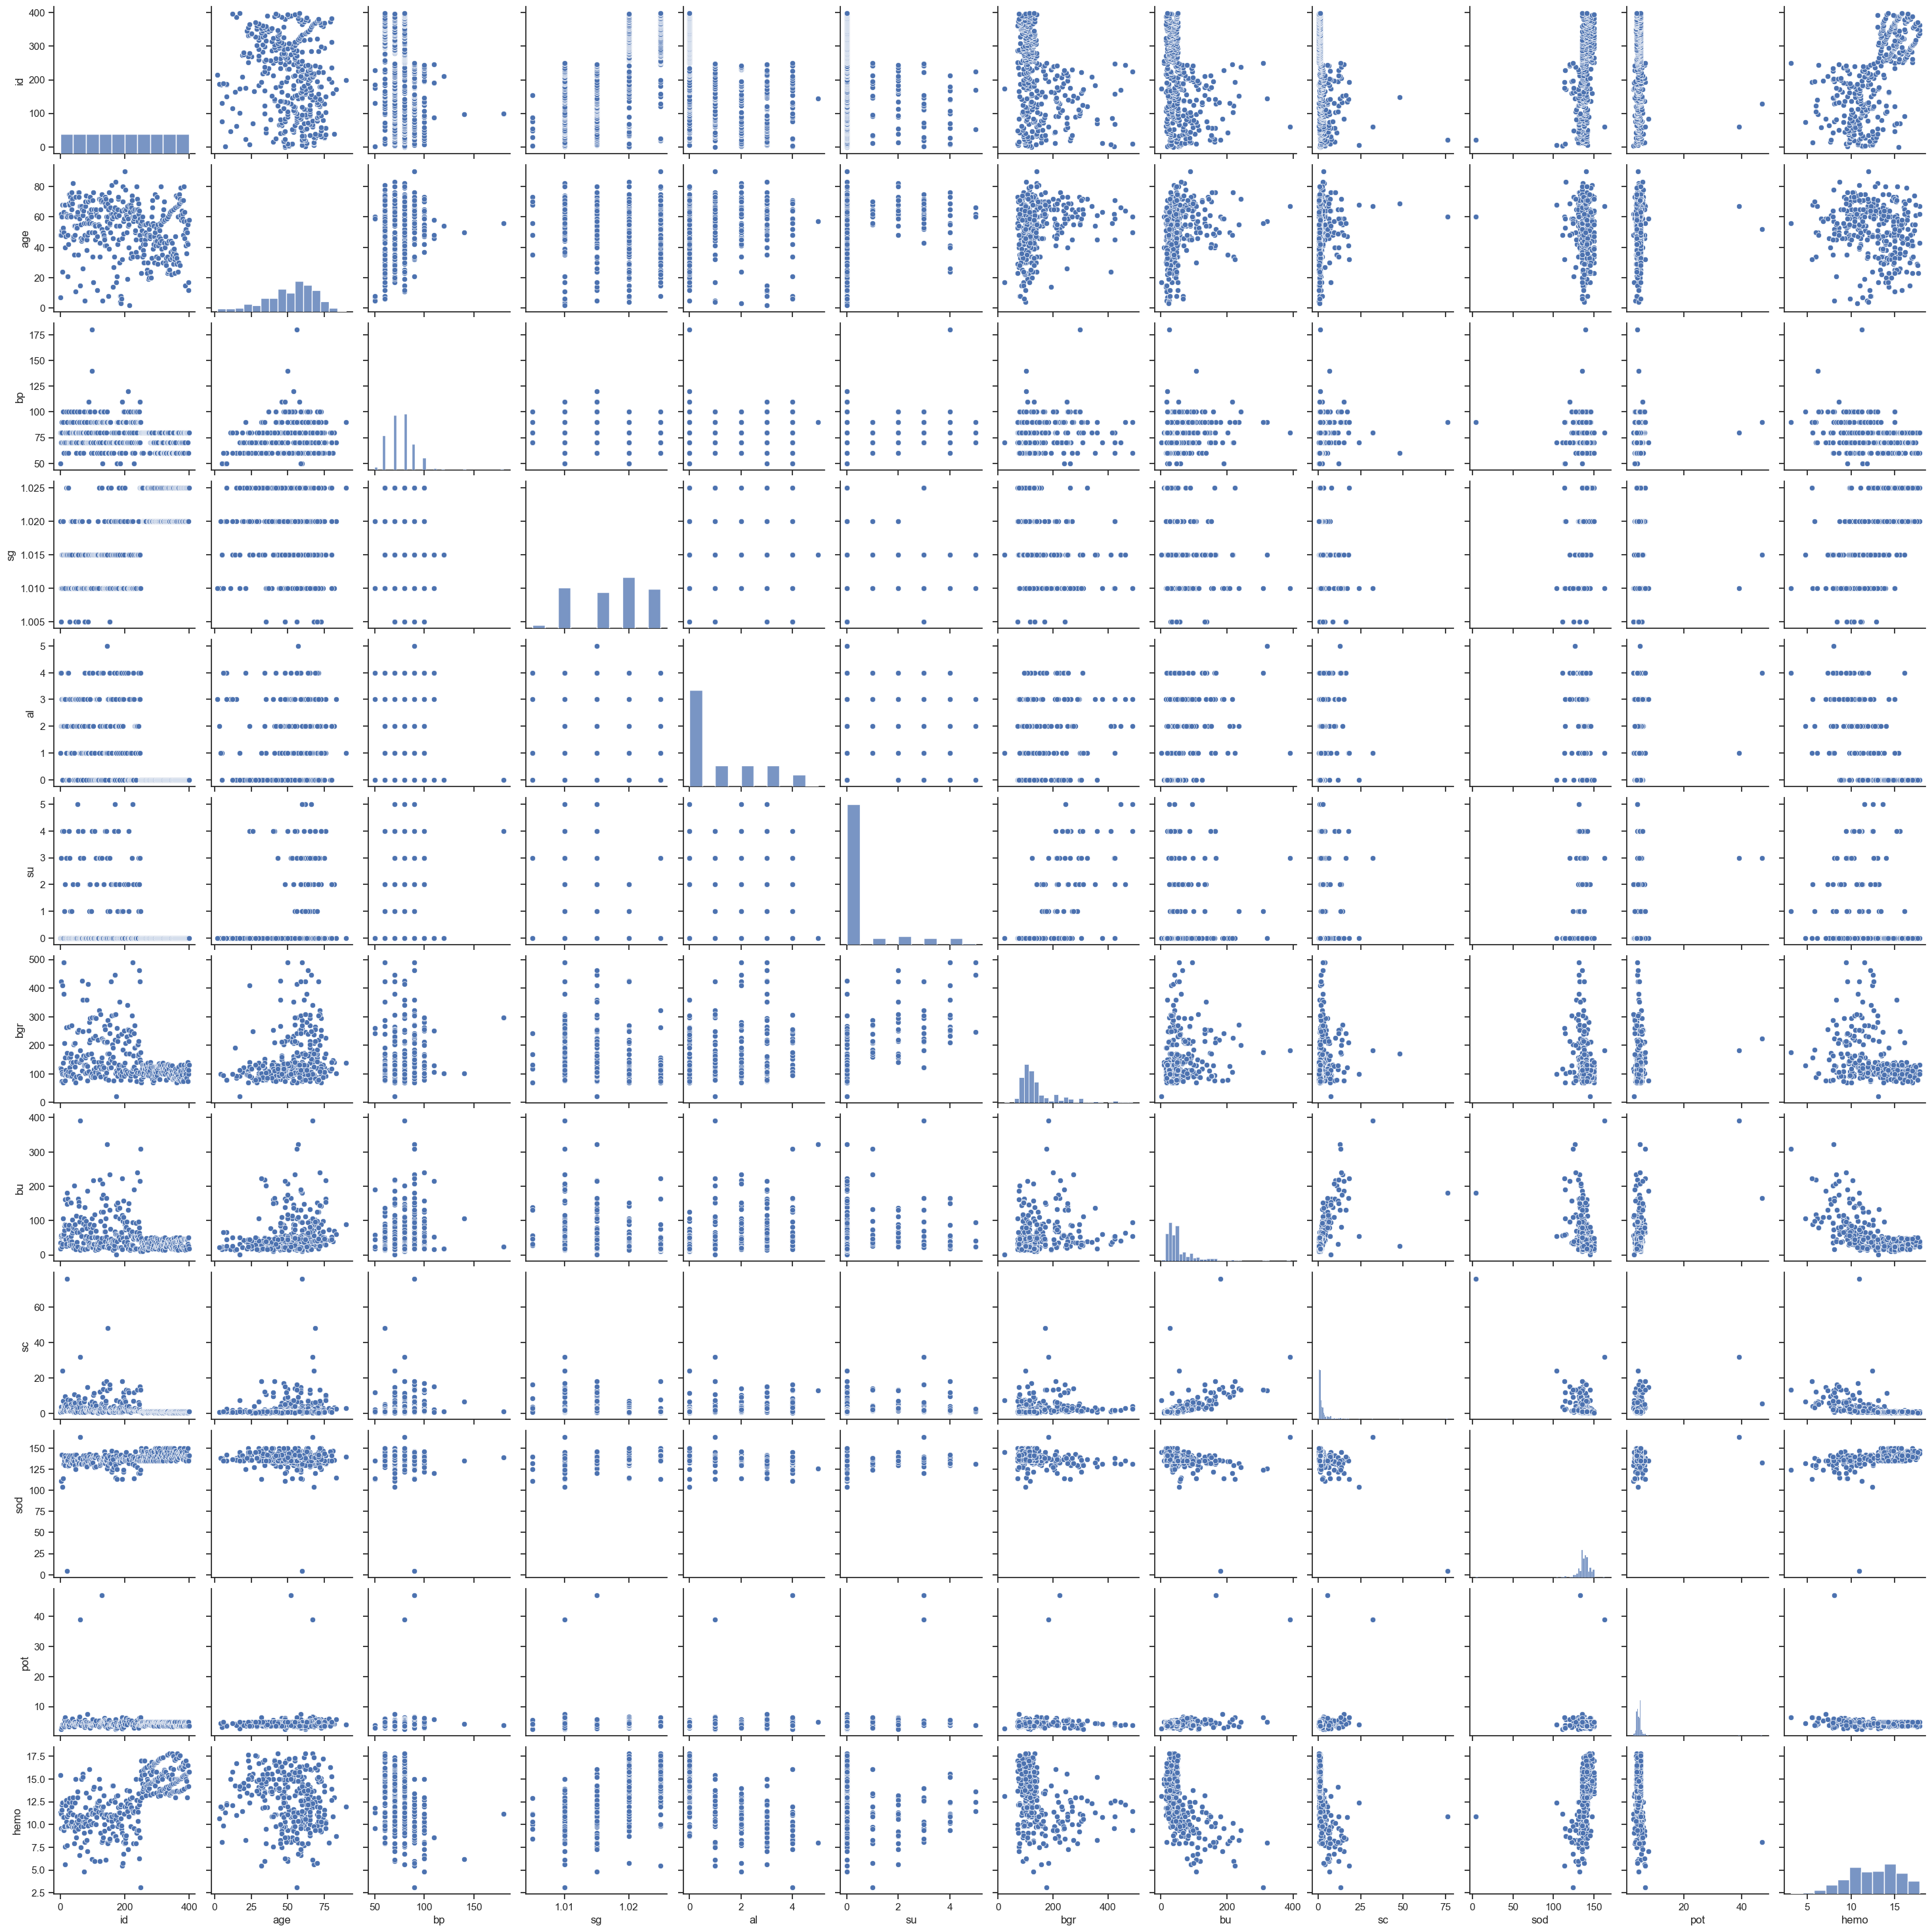

In [13]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(dataset)

### Box Plots

Text(0, 0.5, 'Hemoglobina')

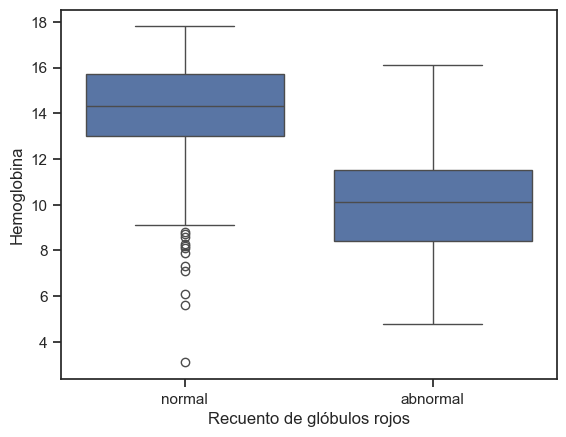

In [15]:
sns.boxplot(x=dataset['rbc'],y=dataset['hemo'])
plt.xlabel("Recuento de glóbulos rojos")
plt.ylabel("Hemoglobina")

### Violin Plots

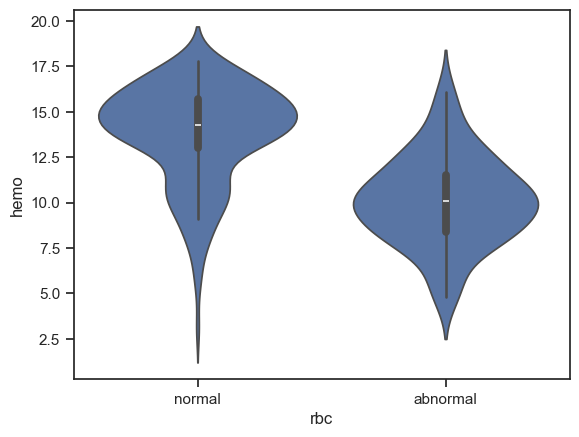

In [17]:
sns.violinplot(x=dataset['rbc'], y=dataset['hemo'])
plt.show()

### Distribution Plot

C:\Users\Rosario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Rosario\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


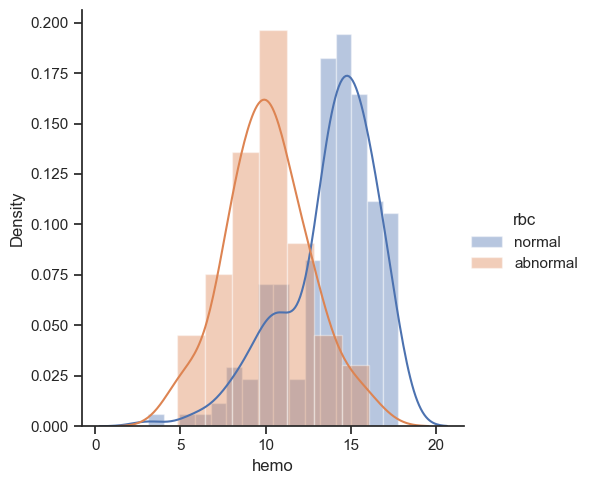

In [19]:
sns.FacetGrid(dataset,hue='rbc', height=5).map(sns.distplot,'hemo').add_legend()

### Joint plot

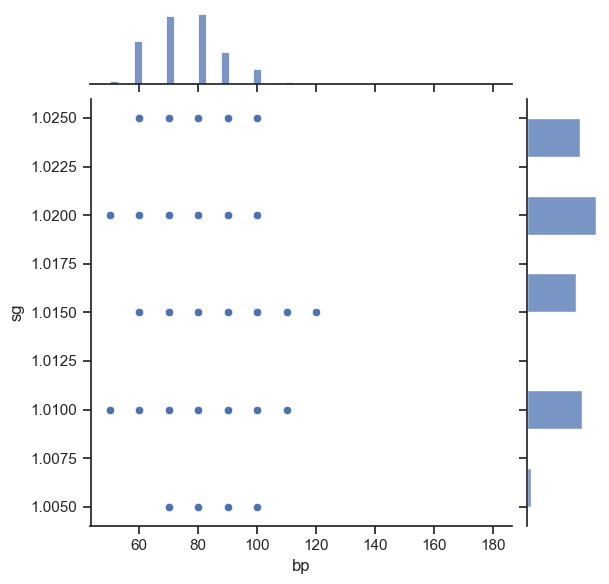

In [21]:
sns.jointplot(x=dataset['bp'], y=dataset['sg'])

### Gráfico en Barras

<BarContainer object of 400 artists>

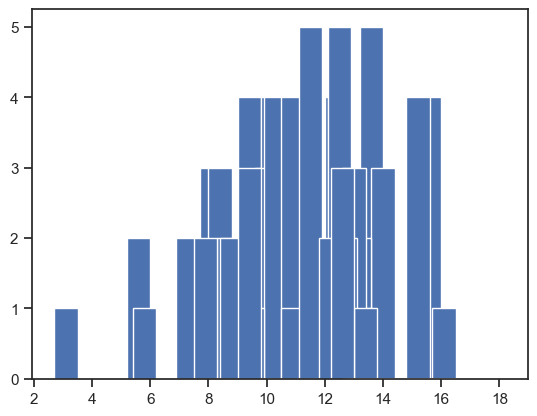

In [23]:
plt.bar(dataset['hemo'],dataset['su'])

### Line Plots

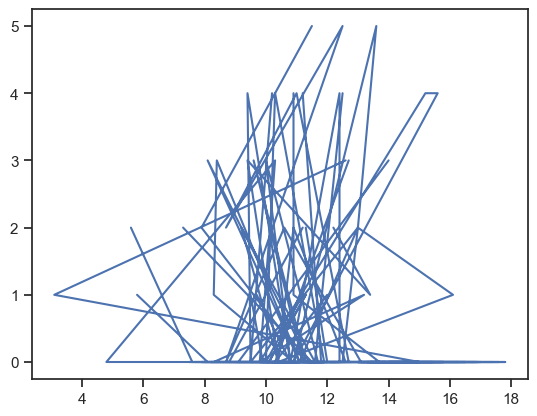

In [25]:
plt.plot(dataset['hemo'],dataset['su'])

In [26]:
# Eliminar columna 'id' 
dataset.drop('id',axis=1,inplace=True)

In [27]:
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [28]:
# Tratamiento de los datos que faltan
dataset['rbc']=dataset['rbc'].fillna(value=dataset['rbc'].mode().iloc[0])
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [29]:
# Valores faltantes (NaN) rellenando cada columna especificada con su valor modal
dataset['pc']=dataset['pc'].fillna(value=dataset['pc'].mode().iloc[0])
dataset['pcc']=dataset['pcc'].fillna(value=dataset['pcc'].mode().iloc[0])
dataset['ba']=dataset['ba'].fillna(value=dataset['ba'].mode().iloc[0])
dataset['htn']=dataset['htn'].fillna(value=dataset['htn'].mode().iloc[0])
dataset['dm']=dataset['dm'].fillna(value=dataset['dm'].mode().iloc[0])
dataset['cad']=dataset['cad'].fillna(value=dataset['cad'].mode().iloc[0])
dataset['appet']=dataset['appet'].fillna(value=dataset['appet'].mode().iloc[0])
dataset['pe']=dataset['pe'].fillna(value=dataset['pe'].mode().iloc[0])
dataset['ane']=dataset['ane'].fillna(value=dataset['ane'].mode().iloc[0])
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [30]:
# Verifica si hay algún valor nulo en cada columna del DataFrame
dataset.isnull().any()

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc               False
pc                False
pcc               False
ba                False
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [31]:
# Continuando en verificar si hay algún valor nulo en cada columna del DataFrame
dataset['age']=dataset['age'].fillna(value=dataset['age'].mean())
dataset['bp']=dataset['bp'].fillna(value=dataset['bp'].mean())
dataset['sg']=dataset['sg'].fillna(value=dataset['sg'].mean())
dataset['al']=dataset['al'].fillna(value=dataset['al'].mean())
dataset['su']=dataset['su'].fillna(value=dataset['su'].mean())
dataset['bgr']=dataset['bgr'].fillna(value=dataset['bgr'].mean())
dataset['bu']=dataset['bu'].fillna(value=dataset['bu'].mean())
dataset['sc']=dataset['sc'].fillna(value=dataset['sc'].mean())
dataset['sod']=dataset['sod'].fillna(value=dataset['sod'].mean())
dataset['pot']=dataset['pot'].fillna(value=dataset['pot'].mean())
dataset['hemo']=dataset['hemo'].fillna(value=dataset['hemo'].mean())
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [32]:
dataset['pcv']=dataset['pcv'].fillna(value=dataset['pcv'].mode().iloc[0])
dataset['wc']=dataset['wc'].fillna(value=dataset['wc'].mode().iloc[0])
dataset['rc']=dataset['rc'].fillna(value=dataset['rc'].mode().iloc[0])

In [33]:
# Limpiar y transformar datos específicos en las columnas 'wc', 'pcv', 'rc' 
dataset.wc=dataset.wc.replace("\t6200",6200)
dataset.wc=dataset.wc.replace("\t8400",8400)
dataset.wc=dataset.wc.replace("\t?",9800)
dataset.pcv=dataset.pcv.replace("\t43",43)
dataset.pcv=dataset.pcv.replace("\t?",41)
dataset.rc=dataset.rc.replace("\t?",5.2)
dataset['wc'].value_counts()
dataset.pcv=dataset.pcv.astype(int)
dataset.wc=dataset.wc.astype(int)
dataset.rc=dataset.rc.astype(float)
dataset['wc'].value_counts()

wc
9800     117
6700      10
9200       9
9600       9
7200       9
        ... 
19100      1
12300      1
16700      1
14900      1
2600       1
Name: count, Length: 89, dtype: int64

### Codificación de etiquetas

In [35]:
# Estas operaciones aseguran que los datos estén limpios y en el formato adecuado para análisis 
# posteriores o modelado de aprendizaje automático, donde la transformación 
# a valores numéricos binarios es esencial para la tarea de clasificación.

dataset.classification = dataset.classification.replace('ckd\t','ckd')
dataset.classification=[1 if each=="ckd" else 0 for each in dataset.classification]


In [36]:
# Cambian los valores en las columnas 'rbc' y 'pc'. 
# Cada entrada se convierte en 1 si es igual a "abnormal" y en 0 si no lo es
dataset.rbc = [ 1 if each == "abnormal" else 0 for each in dataset.rbc]
dataset.pc = [ 1 if each == "abnormal" else 0 for each in dataset.pc]

# Columnas ('pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane') se transforma de manera que cualquier 
# valor igual a "present" se convierte en 1, y cualquier otro valor se convierte en 0
dataset.pcc = [ 1 if each == "present" else 0 for each in dataset.pcc]
dataset.ba = [ 1 if each == "present" else 0 for each in dataset.ba]
dataset.pcc = [ 1 if each == "present" else 0 for each in dataset.pcc]
dataset.htn = [ 1 if each == "present" else 0 for each in dataset.htn]
dataset.dm = [ 1 if each == "present" else 0 for each in dataset.dm]
dataset.cad = [ 1 if each == "present" else 0 for each in dataset.cad]
dataset.appet = [ 1 if each == "present" else 0 for each in dataset.appet]
dataset.pe = [ 1 if each == "present" else 0 for each in dataset.pe]
dataset.ane = [ 1 if each == "present" else 0 for each in dataset.ane]

dataset


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,44,7800,5.2,0,0,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,...,38,6000,5.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,31,7500,5.2,0,0,0,0,0,0,1
3,48.0,70.0,1.005,4.0,0.0,0,1,0,0,117.000000,...,32,6700,3.9,0,0,0,0,0,0,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,35,7300,4.6,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.000000,...,47,6700,4.9,0,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.000000,...,54,7800,6.2,0,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.000000,...,49,6600,5.4,0,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.000000,...,51,7200,5.9,0,0,0,0,0,0,0


In [37]:
x=dataset.iloc[:,:24]
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,...,15.4,44,7800,5.2,0,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,...,11.3,38,6000,5.2,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,...,9.6,31,7500,5.2,0,0,0,0,0,0
3,48.0,70.0,1.005,4.0,0.0,0,1,0,0,117.000000,...,11.2,32,6700,3.9,0,0,0,0,0,0
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,...,11.6,35,7300,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0,0,0,0,140.000000,...,15.7,47,6700,4.9,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,0,0,0,0,75.000000,...,16.5,54,7800,6.2,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,0,0,0,0,100.000000,...,15.8,49,6600,5.4,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,0,0,0,0,114.000000,...,14.2,51,7200,5.9,0,0,0,0,0,0


In [38]:
y=dataset.iloc[:,24:]
y

,classification
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


## Dividir los datos en entrenamiento y prueba

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [41]:
x_train.iloc[:,1:]

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
39,80.0,1.010000,2.000000,2.000000,0,0,0,0,140.000000,70.0,...,13.000000,40,9800,4.2,0,0,0,0,0,0
167,70.0,1.020000,0.000000,0.000000,1,0,0,0,139.000000,19.0,...,12.700000,42,2200,5.2,0,0,0,0,0,0
383,80.0,1.025000,0.000000,0.000000,0,0,0,0,119.000000,46.0,...,13.900000,49,5100,5.0,0,0,0,0,0,0
221,70.0,1.020000,1.000000,0.000000,0,0,0,0,248.000000,30.0,...,12.526437,41,9800,5.2,0,0,0,0,0,0
351,80.0,1.020000,0.000000,0.000000,0,0,0,0,83.000000,49.0,...,17.500000,40,9900,4.7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,80.0,1.025000,0.000000,0.000000,0,0,0,0,121.000000,27.0,...,13.600000,52,9200,6.3,0,0,0,0,0,0
72,90.0,1.010000,3.000000,3.000000,0,1,0,0,148.036517,35.0,...,10.300000,41,9800,5.2,0,0,0,0,0,0
396,70.0,1.025000,0.000000,0.000000,0,0,0,0,75.000000,31.0,...,16.500000,54,7800,6.2,0,0,0,0,0,0
235,70.0,1.010000,2.000000,0.000000,0,0,0,0,113.000000,93.0,...,7.900000,26,5700,5.2,0,0,0,0,0,0


### Escalado de características

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)
dump(sc,"scalarapp.save")

['scalarapp.save']

## Clasificación por árbol de decisión 

In [45]:
pip install graphviz pydotplus scikit-learn


Note: you may need to restart the kernel to use updated packages.


[0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 1 1 1 1 0 0]


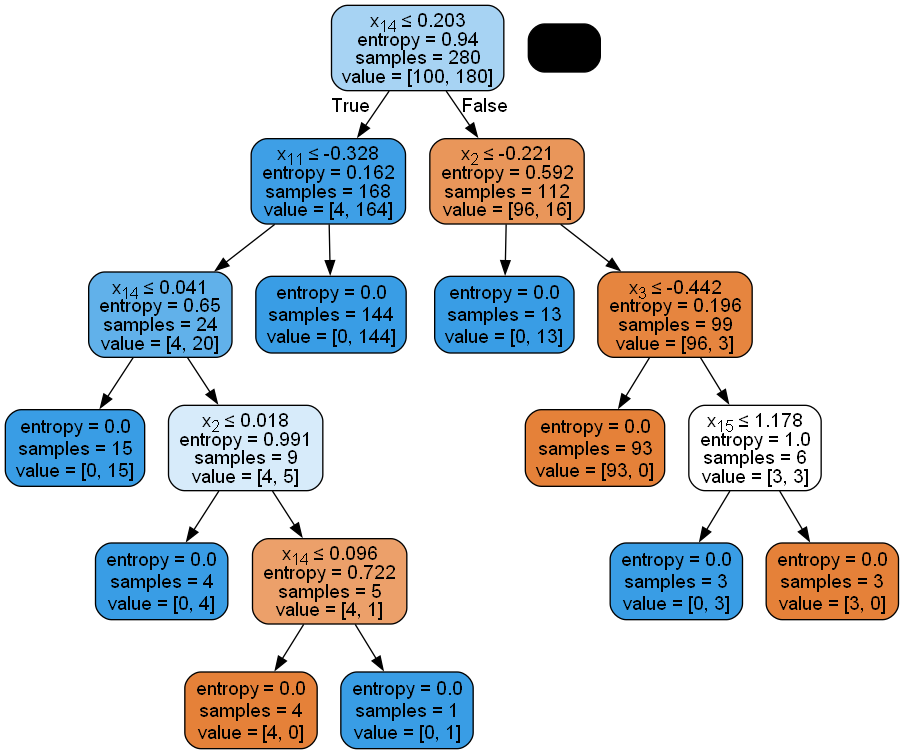

In [48]:
# Crear y entrenar el clasificador
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(x_train, y_train)

# Guardar el modelo entrenado
with open('decisionapp.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Predecir con el modelo
y_predict = dt.predict(x_test)
print(y_predict)  # Para verificar las predicciones

# Exportar el gráfico del árbol
dot_data = export_graphviz(dt, out_file=None, filled=True, rounded=True, special_characters=True)

# Convertir el gráfico a un objeto Image y mostrarlo
graph = pydotplus.graph_from_dot_data(dot_data)
image = Image(graph.create_png())
display(image)

## Puntuación de exactitud

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy_formatted = "{:.2f}".format(accuracy)
accuracy_formatted

## Matriz de confunsión

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

In [ ]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN =cm[1, 0]
r=(TP + TN) / float(TP + TN + FP + FN)
r_formatted= "{:.2f}".format(r)
r_formatted

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,lw =2,cbar=False)
plt.ylabel("Valores verdaderos")
plt.xlabel("Valores previstos")
plt.title("VISUALIZACIÓN DE LA MATRIZ DE CONFUSIÓN")
plt.show()

## AUC - ROC CURVE (Area Under the Receiver Operating Characteristic Curve) 

In [ ]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predict)
roc_auc=metrics.auc(fpr,tpr)
roc_auc_formatted = "{:.2f}".format(roc_auc)
roc_auc_formatted

In [ ]:
plt.title('Característica operativa del receptor')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.plot